# Google Data Analytics Capstone Project 1: Cyclistics

## Import data

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/GDA Capstone/Cyclistic Data XLXS

Mounted at /content/drive
/content/drive/MyDrive/GDA Capstone/Cyclistic Data XLXS


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics

In [3]:
df1 = pd.read_excel("202007-divvy-tripdata.xlsx")
df2 = pd.read_excel("202008-divvy-tripdata.xlsx")
df3 = pd.read_excel("202009-divvy-tripdata.xlsx")
df4 = pd.read_excel("202010-divvy-tripdata.xlsx")
df5 = pd.read_excel("202011-divvy-tripdata.xlsx")
df6 = pd.read_excel("202012-divvy-tripdata.xlsx")
df7 = pd.read_excel("202101-divvy-tripdata.xlsx")
df8 = pd.read_excel("202102-divvy-tripdata.xlsx")
df9 = pd.read_excel("202103-divvy-tripdata.xlsx")
df10 = pd.read_excel("202104-divvy-tripdata.xlsx")
df11 = pd.read_excel("202105-divvy-tripdata.xlsx")
df12 = pd.read_excel("202106-divvy-tripdata.xlsx")

### Conbine all data into one single dataframe

In [5]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12])

In [6]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,week_day
0,762198876D69004D,docked_bike,2020-07-09 15:22:02,2020-07-09 15:25:52,Ritchie Ct & Banks St,180,Wells St & Evergreen Ave,291,41.906866,-87.626217,41.906724,-87.634830,member,230,4,Thursday
1,BEC9C9FBA0D4CF1B,docked_bike,2020-07-24 23:56:30,2020-07-25 00:20:17,Halsted St & Roscoe St,299,Broadway & Ridge Ave,461,41.943670,-87.648950,41.984045,-87.660274,member,1427,5,Friday
2,D2FD8EA432C77EC1,docked_bike,2020-07-08 19:49:07,2020-07-08 19:56:22,Lake Shore Dr & Diversey Pkwy,329,Clark St & Wellington Ave,156,41.932588,-87.636427,41.936497,-87.647539,casual,435,3,Wednesday
3,54AE594E20B35881,docked_bike,2020-07-17 19:06:42,2020-07-17 19:27:38,LaSalle St & Illinois St,181,Clark St & Armitage Ave,94,41.890762,-87.631697,41.918306,-87.636282,casual,1256,5,Friday
4,54025FDC7440B56F,docked_bike,2020-07-04 10:39:57,2020-07-04 10:45:05,Lake Shore Dr & North Blvd,268,Clark St & Schiller St,301,41.911722,-87.626804,41.907993,-87.631501,member,308,6,Saturday


### Drop redundant columns and rows

In [7]:
df.drop(['start_lat','start_lng','end_lat', 'end_lng'], axis=1, inplace=True)

As ride which lasted less than a minute can usually be staffs taking bikes out to check their quality or users changing their mind right after taking the bikes out so we will remove it from the dataset.

In [8]:
df = df[df.ride_length >= 60]

In [9]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length,day_of_week,week_day
0,762198876D69004D,docked_bike,2020-07-09 15:22:02,2020-07-09 15:25:52,Ritchie Ct & Banks St,180,Wells St & Evergreen Ave,291,member,230,4,Thursday
1,BEC9C9FBA0D4CF1B,docked_bike,2020-07-24 23:56:30,2020-07-25 00:20:17,Halsted St & Roscoe St,299,Broadway & Ridge Ave,461,member,1427,5,Friday
2,D2FD8EA432C77EC1,docked_bike,2020-07-08 19:49:07,2020-07-08 19:56:22,Lake Shore Dr & Diversey Pkwy,329,Clark St & Wellington Ave,156,casual,435,3,Wednesday
3,54AE594E20B35881,docked_bike,2020-07-17 19:06:42,2020-07-17 19:27:38,LaSalle St & Illinois St,181,Clark St & Armitage Ave,94,casual,1256,5,Friday
4,54025FDC7440B56F,docked_bike,2020-07-04 10:39:57,2020-07-04 10:45:05,Lake Shore Dr & North Blvd,268,Clark St & Schiller St,301,member,308,6,Saturday


In [10]:
df.shape

(4382635, 12)

## Adding data and splitting the dataset

In [12]:
df['start_date'] = df['started_at'].dt.day 
df['end_date'] = df['ended_at'].dt.day
df['month'] = df['started_at'].dt.month
df['year'] = df['started_at'].dt.year

In [29]:
df.head()
df.to_csv("aggregated_data.csv")

In [14]:
len(df[df.member_casual=='member']),len(df[df.member_casual=='casual'])

(2482153, 1900482)

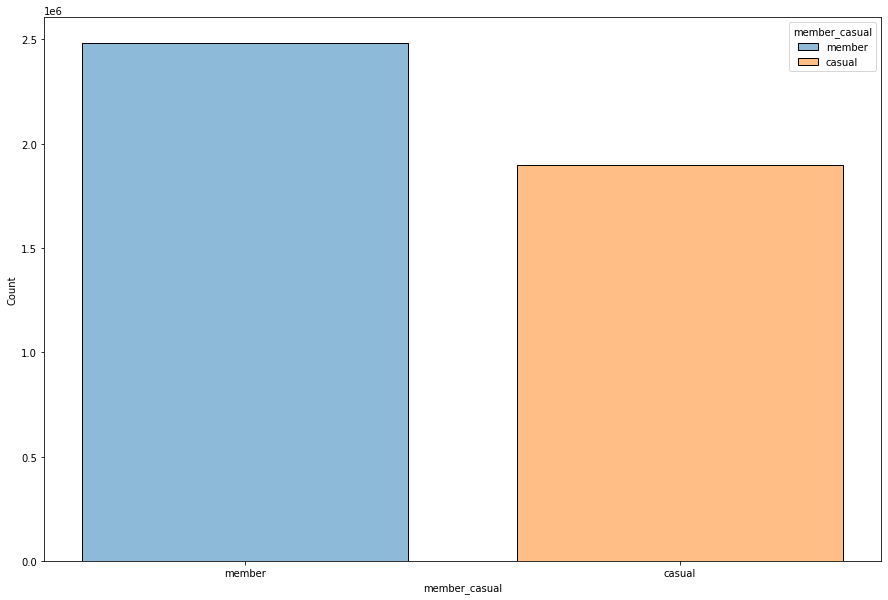

In [15]:
plt.figure(figsize=(15,10))
sns.histplot(data=df,x='member_casual', hue="member_casual", shrink=0.75)

As we can see the distribution of the the member type is about **62%** and **38%** for **member** and **casual** respectively

Splitting the data into 2 categories: member and casual for future analysis

In [30]:
df_member = df[df.member_casual=='member']
df_member.to_csv("member_only.csv")
df_casual = df[df.member_casual=='casual']
df_casual.to_csv("casual_only.csv")

## Descriptive Analysis

In [17]:
mean_ride_length = pd.DataFrame({'member_type':['member', 'casual'], 'mean_ride_length': [np.mean(df_member['ride_length']), np.mean(df_casual['ride_length'])]})

In [18]:
mean_ride_length

,member_type,mean_ride_length
0,member,903.198464
1,casual,2048.667294


In [19]:
median_ride_length = pd.DataFrame({'member_type':['member', 'casual'], 'mean_ride_length': [np.median(df_member['ride_length']), np.median(df_casual['ride_length'])]})

In [20]:
median_ride_length

,member_type,mean_ride_length
0,member,659.0
1,casual,1173.0


In [21]:
max_ride_length = pd.DataFrame({'member_type':['member', 'casual'], 'mean_ride_length': [max(df_member['ride_length']), max(df_casual['ride_length'])]})

In [22]:
max_ride_length

,member_type,mean_ride_length
0,member,86383
1,casual,86397


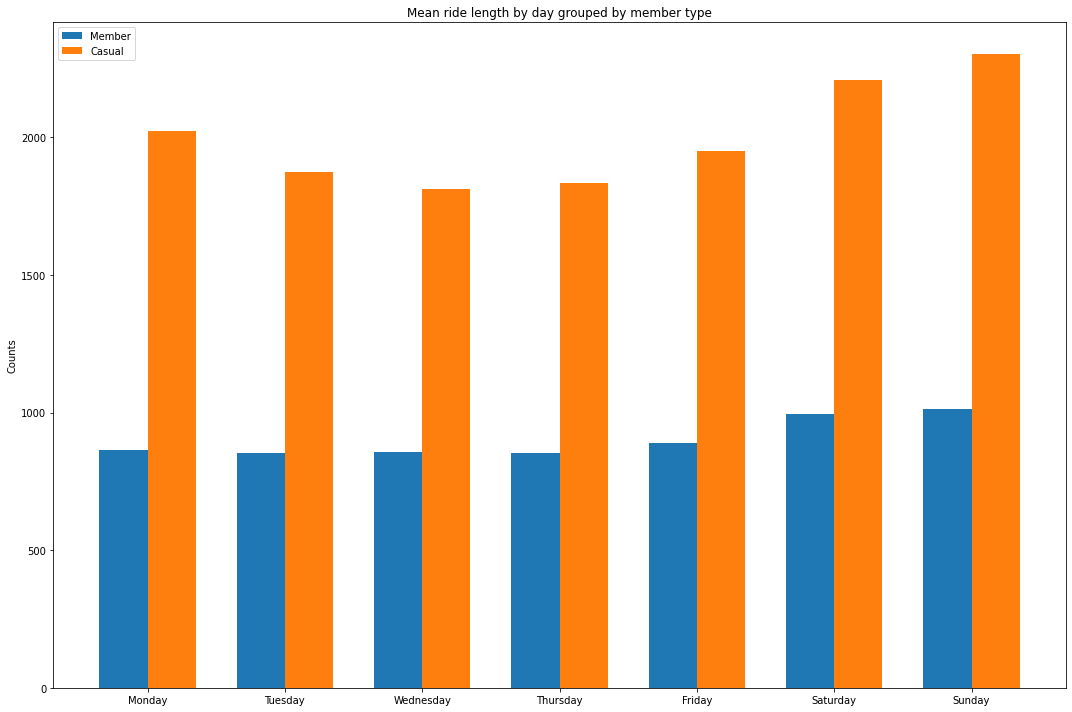

In [23]:
day_ride_mean_member = [np.mean(df_member[df_member.week_day=='Monday'].ride_length),
                        np.mean(df_member[df_member.week_day=='Tuesday'].ride_length),
                        np.mean(df_member[df_member.week_day=='Wednesday'].ride_length),
                        np.mean(df_member[df_member.week_day=='Thursday'].ride_length),
                        np.mean(df_member[df_member.week_day=='Friday'].ride_length),
                        np.mean(df_member[df_member.week_day=='Saturday'].ride_length),
                        np.mean(df_member[df_member.week_day=='Sunday'].ride_length)]

day_ride_mean_casual = [np.mean(df_casual[df_casual.week_day=='Monday'].ride_length),
                        np.mean(df_casual[df_casual.week_day=='Tuesday'].ride_length),
                        np.mean(df_casual[df_casual.week_day=='Wednesday'].ride_length),
                        np.mean(df_casual[df_casual.week_day=='Thursday'].ride_length),
                        np.mean(df_casual[df_casual.week_day=='Friday'].ride_length),
                        np.mean(df_casual[df_casual.week_day=='Saturday'].ride_length),
                        np.mean(df_casual[df_casual.week_day=='Sunday'].ride_length)]
                
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(x - width/2, day_ride_mean_member, width, label='Member')
rects2 = ax.bar(x + width/2, day_ride_mean_casual, width, label='Casual')


ax.set_ylabel('Counts')
ax.set_title('Mean ride length by day grouped by member type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()

plt.show()

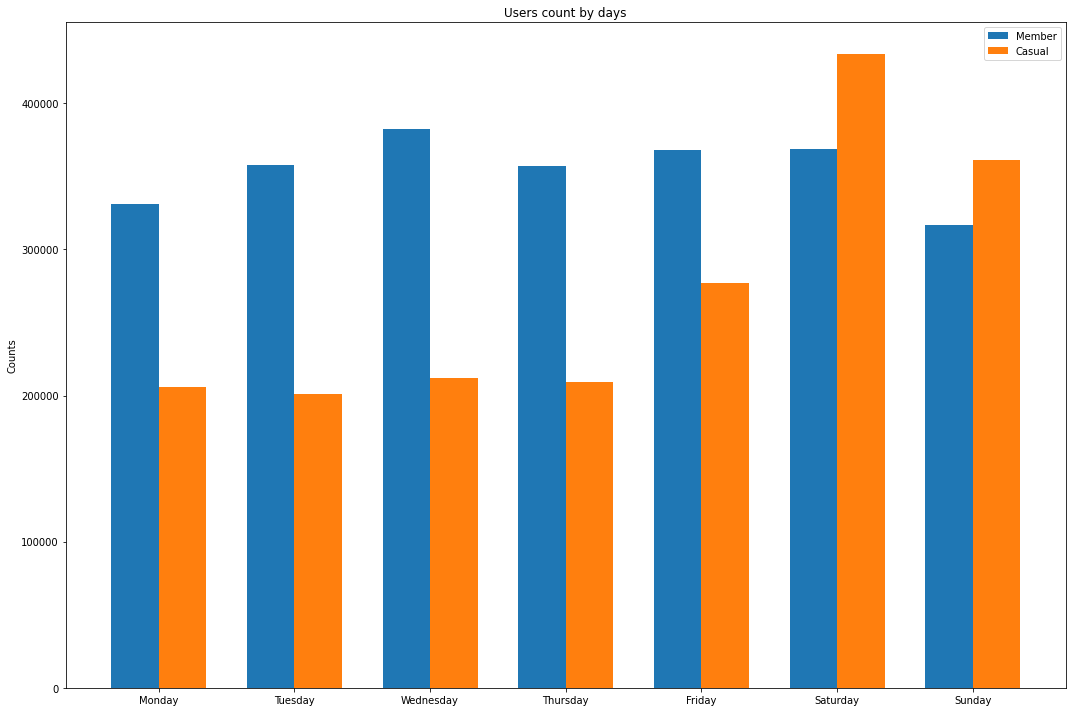

In [24]:
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
member_counts = [331366,357825,382364,357398,367818,368801,316581]
casual_counts = [206081,200852,212185,209252,276849,433714,361549]
fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(x - width/2, member_counts, width, label='Member')
rects2 = ax.bar(x + width/2, casual_counts, width, label='Casual')


ax.set_ylabel('Counts')
ax.set_title('Users count by days')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()

plt.show()

One thing that can easily be seen from the charts is that, across the week, casual users tend to use the bikes longer than member users. However the number of member user on weekdays are much higher than that of casual members. Another thing is that the number of member user is stable throughout the week, while that of casual user has a rise at the weekend.

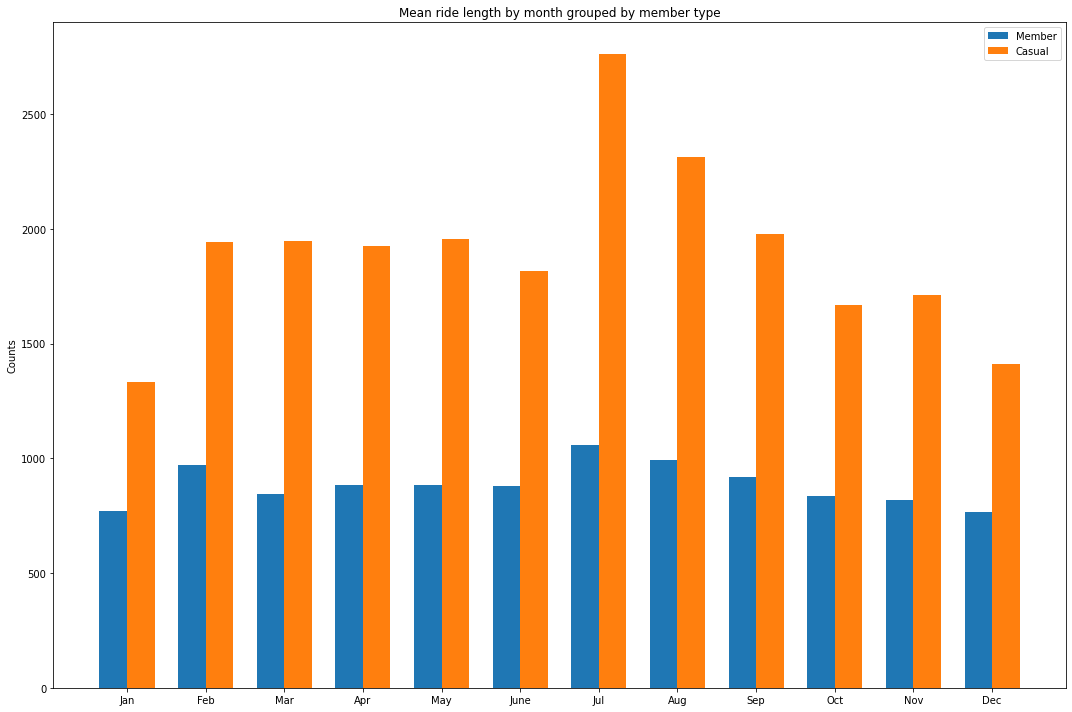

In [25]:
month_ride_mean_member = [np.mean(df_member[df_member.month==1].ride_length),
                        np.mean(df_member[df_member.month==2].ride_length),
                        np.mean(df_member[df_member.month==3].ride_length),
                        np.mean(df_member[df_member.month==4].ride_length),
                        np.mean(df_member[df_member.month==5].ride_length),
                        np.mean(df_member[df_member.month==6].ride_length),
                        np.mean(df_member[df_member.month==7].ride_length),
                        np.mean(df_member[df_member.month==8].ride_length),
                        np.mean(df_member[df_member.month==9].ride_length),
                        np.mean(df_member[df_member.month==10].ride_length),
                        np.mean(df_member[df_member.month==11].ride_length),
                        np.mean(df_member[df_member.month==12].ride_length)]

month_ride_mean_casual = [np.mean(df_casual[df_casual.month==1].ride_length),
                        np.mean(df_casual[df_casual.month==2].ride_length),
                        np.mean(df_casual[df_casual.month==3].ride_length),
                        np.mean(df_casual[df_casual.month==4].ride_length),
                        np.mean(df_casual[df_casual.month==5].ride_length),
                        np.mean(df_casual[df_casual.month==6].ride_length),
                        np.mean(df_casual[df_casual.month==7].ride_length),
                        np.mean(df_casual[df_casual.month==8].ride_length),
                        np.mean(df_casual[df_casual.month==9].ride_length),
                        np.mean(df_casual[df_casual.month==10].ride_length),
                        np.mean(df_casual[df_casual.month==11].ride_length),
                        np.mean(df_casual[df_casual.month==12].ride_length)]
                        
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(x - width/2, month_ride_mean_member, width, label='Member')
rects2 = ax.bar(x + width/2, month_ride_mean_casual, width, label='Casual')


ax.set_ylabel('Counts')
ax.set_title('Mean ride length by month grouped by member type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()

plt.show()

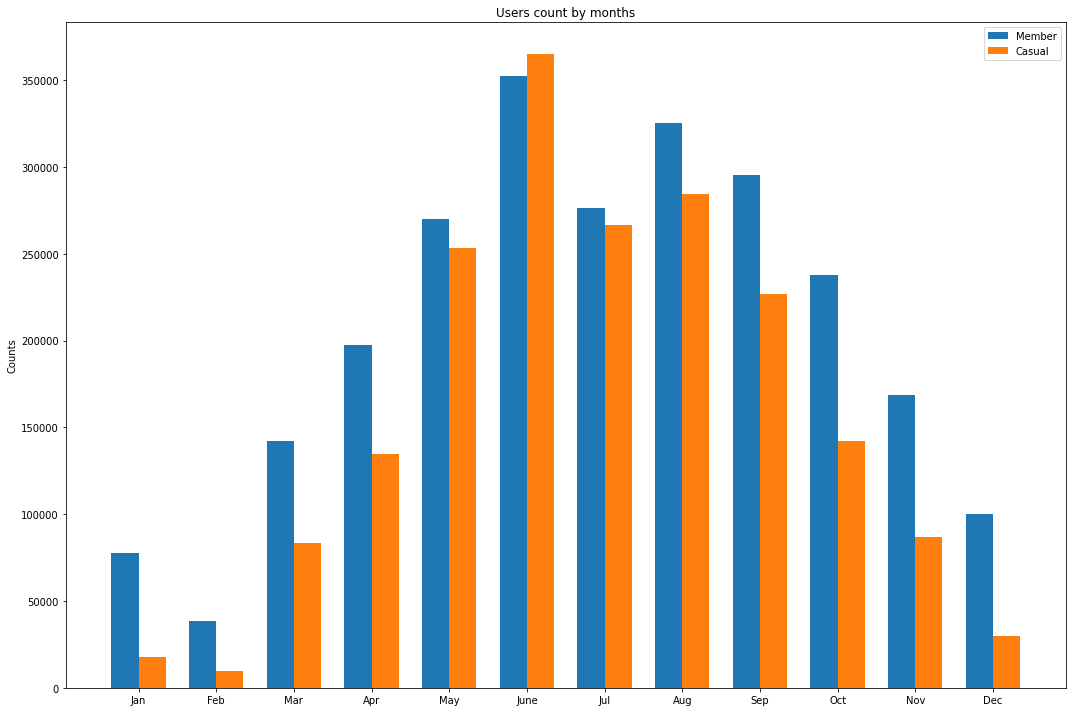

In [26]:
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
member_counts = [df_member[df_member.month==1].ride_id.count(),
                 df_member[df_member.month==2].ride_id.count(),
                 df_member[df_member.month==3].ride_id.count(),
                 df_member[df_member.month==4].ride_id.count(),
                 df_member[df_member.month==5].ride_id.count(),
                 df_member[df_member.month==6].ride_id.count(),
                 df_member[df_member.month==7].ride_id.count(),
                 df_member[df_member.month==8].ride_id.count(),
                 df_member[df_member.month==9].ride_id.count(),
                 df_member[df_member.month==10].ride_id.count(),
                 df_member[df_member.month==11].ride_id.count(),
                 df_member[df_member.month==12].ride_id.count()]

casual_counts = [df_casual[df_casual.month==1].ride_id.count(),
                 df_casual[df_casual.month==2].ride_id.count(),
                 df_casual[df_casual.month==3].ride_id.count(),
                 df_casual[df_casual.month==4].ride_id.count(),
                 df_casual[df_casual.month==5].ride_id.count(),
                 df_casual[df_casual.month==6].ride_id.count(),
                 df_casual[df_casual.month==7].ride_id.count(),
                 df_casual[df_casual.month==8].ride_id.count(),
                 df_casual[df_casual.month==9].ride_id.count(),
                 df_casual[df_casual.month==10].ride_id.count(),
                 df_casual[df_casual.month==11].ride_id.count(),
                 df_casual[df_casual.month==12].ride_id.count()]

fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(x - width/2, member_counts, width, label='Member')
rects2 = ax.bar(x + width/2, casual_counts, width, label='Casual')


ax.set_ylabel('Counts')
ax.set_title('Users count by months')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()

plt.show()

When grouped by months, we can see the general trend where the casual user ride longer but the number of rider is less is still true. However looking at the counts for each month, we can see that during the winter, the number of user dropped significantly comparing to the summer.